# Statistical methods in AI

## Assignment 2

### Problem 4.3:
### Colours

Given a datset, we need to predict which gaussian distributions have predicted the data. Let us take a look at the dataset given to us

In [22]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
from tqdm import tqdm
from sklearn.mixture import GaussianMixture as GMM

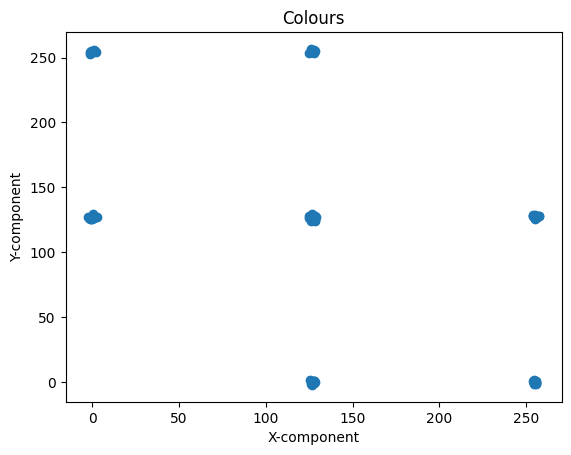

In [23]:
with open('colors.pkl', 'rb') as f:
    data = pickle.load(f)

plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('X-component')
plt.ylabel('Y-component')
plt.title('Colours')
plt.show()

Let us fit this data using gaussian distributions. We can use the GMM from the sklearn library forease of implementation.

In [29]:
model = GMM(n_components=7)
model.fit(data)

GaussianMixture(n_components=7)

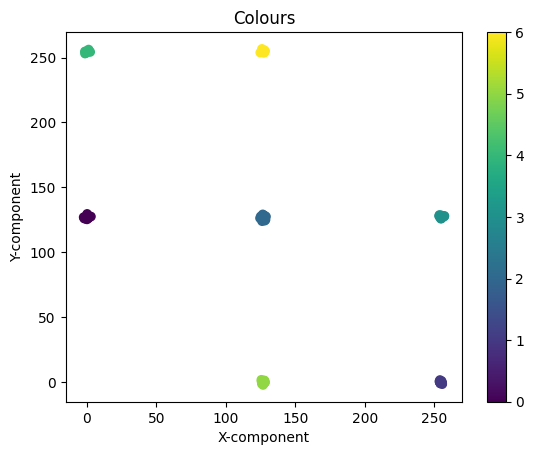

In [30]:
plt.scatter(data[:, 0], data[:, 1], c = model.predict(data))
plt.xlabel('X-component')
plt.ylabel('Y-component')
plt.title('Colours')
plt.colorbar()
plt.show()

As we can see, the GMM model has highlighted the various color components as above. Following are the parameters that our model has predicted.

In [32]:
for i in range(7):
    print('------------------')

    print(f'mean for color {i} :')
    print(model.means_[i])

    print(f'variance for color {i} :')
    print(model.covariances_[i])


------------------
mean for color 0 :
[9.95904977e-02 1.26934805e+02]
variance for color 0 :
[[1.6740466  0.30152784]
 [0.30152784 0.89468541]]
------------------
mean for color 1 :
[ 2.54828851e+02 -2.08589583e-01]
variance for color 1 :
[[ 0.38531507 -0.21305776]
 [-0.21305776  0.64412607]]
------------------
mean for color 2 :
[127.17292232 126.60536724]
variance for color 2 :
[[ 1.19754533 -0.01923169]
 [-0.01923169  1.70463777]]
------------------
mean for color 3 :
[255.16566837 127.35850043]
variance for color 3 :
[[ 1.02962802 -0.03525602]
 [-0.03525602  0.57207645]]
------------------
mean for color 4 :
[  0.2674397  254.51816147]
variance for color 4 :
[[1.63856537 0.49894624]
 [0.49894624 0.65573231]]
------------------
mean for color 5 :
[ 1.27065742e+02 -8.44575440e-02]
variance for color 5 :
[[0.72802356 0.03254854]
 [0.03254854 1.04653338]]
------------------
mean for color 6 :
[126.9316877  254.85195292]
variance for color 6 :
[[1.09300903 0.05372962]
 [0.05372962 0.932

Now, we use these means and variances to generate the data and compare it to the original data.

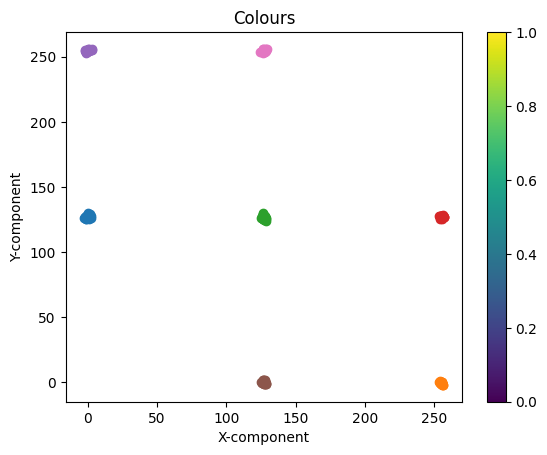

In [35]:
for i in range(7):
       x, y = np.random.multivariate_normal(model.means_[i], model.covariances_[i], 25).T
       plt.scatter(x, y) 

plt.xlabel('X-component')
plt.ylabel('Y-component')
plt.title('Colours')
plt.colorbar()
plt.show()


So this shows that our predicted means and covariances gives the same clusters as our original data.